<a href="https://colab.research.google.com/github/asmaradhiah/PBI/blob/main/Lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MACHINE LEARNING ON BUILT-IN NUMERIC DATASET
# Dataset: Diabetes (sklearn builtin dataset)

In [ ]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# 2. Load built-in numeric dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

print("Feature names:", diabetes.feature_names) #column name
print("Shape of dataset:", X.shape) #columns,rows


Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Shape of dataset: (442, 10)


In [ ]:
# 3. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #testsize is 20% test, 80% train, Random State 42

# 4. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #fit transform to, train x portion data and teach patter of data to model
X_test_scaled = scaler.transform(X_test)


In [ ]:
# 5. Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
# 6. Predict on test data
y_pred = model.predict(X_test_scaled)


In [ ]:
# 7. Evaluate model (Regression metrics)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Regression Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")



--- Regression Evaluation ---
Mean Absolute Error (MAE): 42.79
Mean Squared Error (MSE): 2900.19
R² Score: 0.45


In [ ]:
# 8. Convert continuous predictions to 3 classes (Low, Medium, High)
def categorize(values):
    thresholds = np.percentile(values, [33, 66]) #class category to 1-33, 34-66, >66
    return np.digitize(values, thresholds) #digitize function will return low=0, medium=1, high=2

y_test_class = categorize(y_test)
y_pred_class = categorize(y_pred)


In [ ]:
# 9. Compute Confusion Matrix
cm = confusion_matrix(y_test_class, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'Medium', 'High'])

print("\n--- Confusion Matrix (Discretized) ---")
print(cm)




--- Confusion Matrix (Discretized) ---
[[18  8  4]
 [11 11  7]
 [ 1 10 19]]


<Figure size 600x500 with 0 Axes>

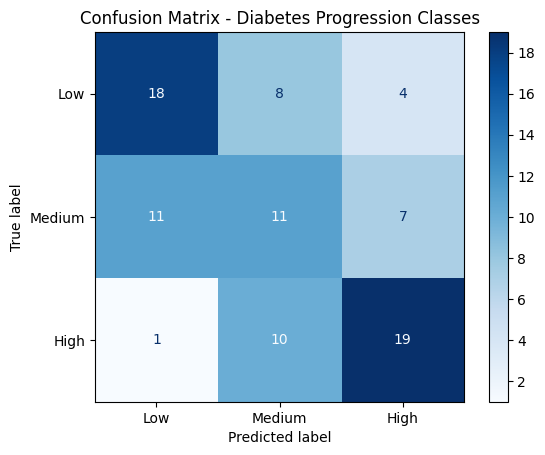

In [ ]:
# 10. Plot Confusion Matrix
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Diabetes Progression Classes")
plt.show()

In [ ]:
# Perform Machine Learning for Numeric Data using SciKitLearn builtin Breast Cancer dataset
# Use 3 different models 1. Naive Bayes (BernouliNB); 2. SVM; 3. Random Forest

Using Random Forest

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print(f"Features: {data.feature_names}")
print(f"Dataset shape: {df.shape}")
df.head()

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Dataset shape: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 455
Testing samples: 114


In [ ]:
# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

Model Accuracy: 95.61%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



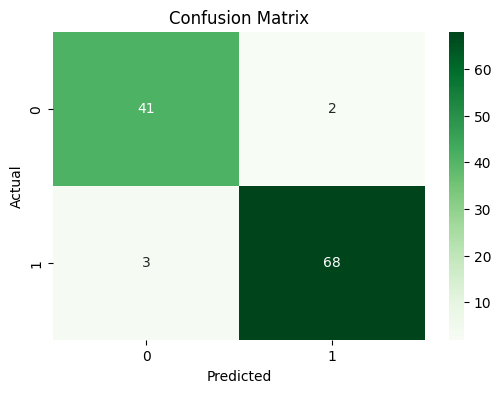

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

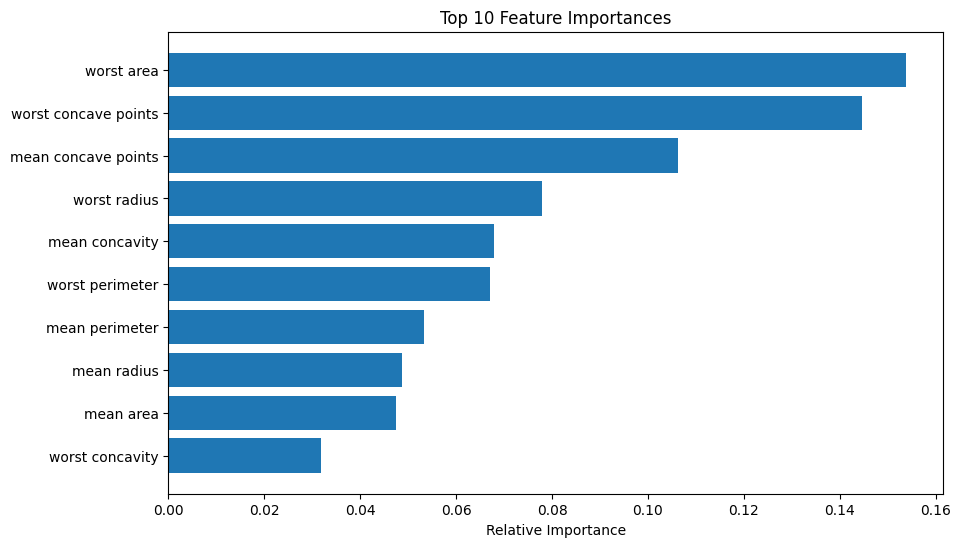

In [ ]:
# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(10,6))
plt.title('Top 10 Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [data.feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
filt_importance = pd.Series(importances, index=data.feature_names)
cols_to_keep = filt_importance[filt_importance > 0.04].index.tolist()
X_filter = df[cols_to_keep]
print(f"Columns kept: {cols_to_keep}")

Columns kept: ['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concave points']


<Axes: >

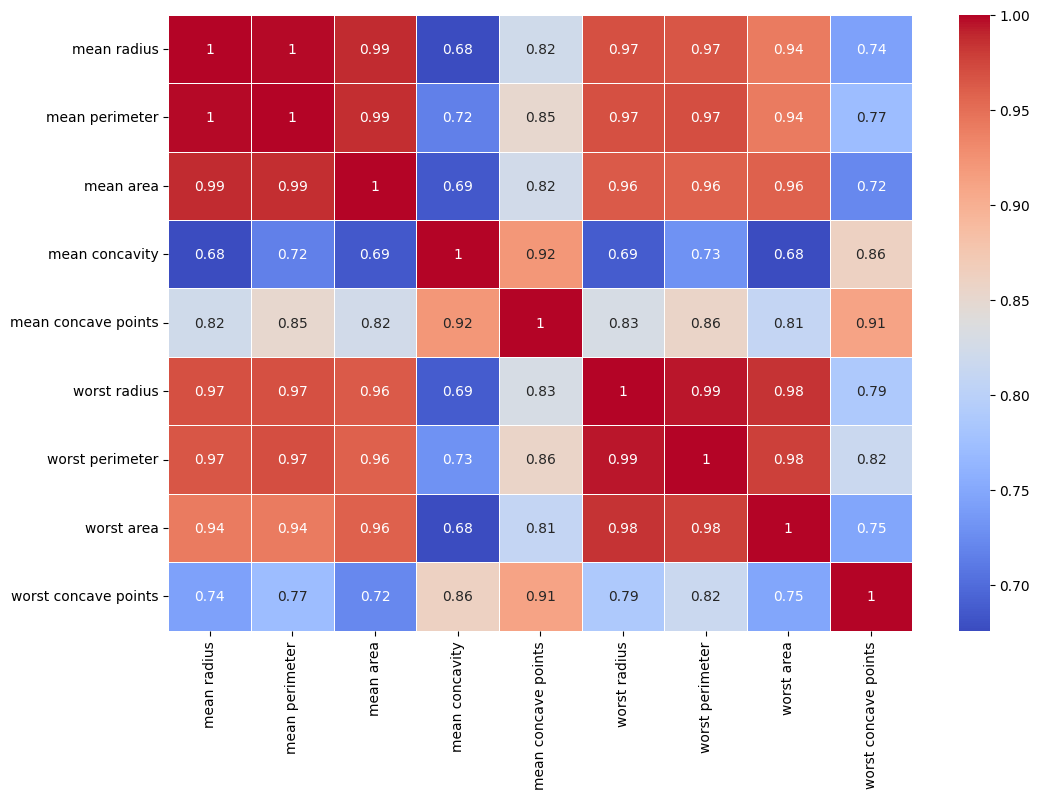

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrixs = X_filter.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrixs, annot=True, cmap='coolwarm', linewidths=0.5)

Naive Bayes

Model Accuracy: 95.61%

Detailed Report:
               precision    recall  f1-score   support

   malignant       0.91      0.98      0.94        43
      benign       0.99      0.94      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



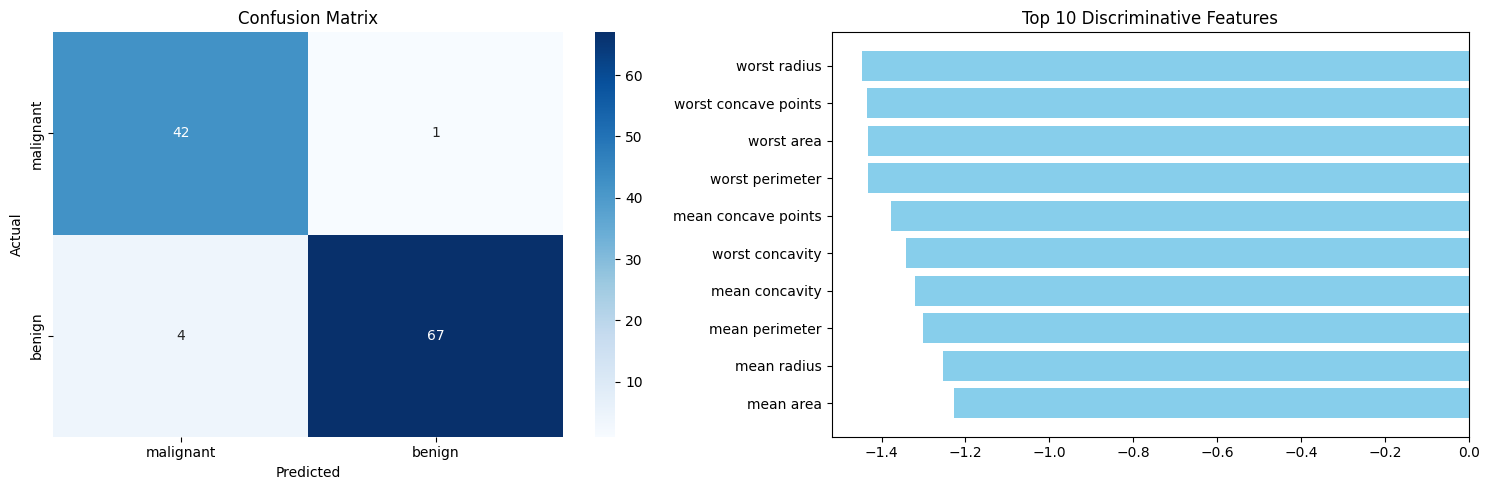

In [ ]:
# ---------------------------------------------------------
# ML: Breast Cancer Classification using BernoulliNB
# ---------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Load Data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 2. Preprocessing: Binarize the numeric data
# BernoulliNB expects 0 or 1. We use the median as the threshold.
X_binarized = (X > X.median()).astype(int)

# 3. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_binarized, y, test_size=0.2, random_state=42)

# 4. Model Training
model = BernoulliNB()
model.fit(X_train, y_train)

# 5. Predictions & Evaluation
y_pred = model.predict(X_test)

print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("\nDetailed Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

# 6. Visualizing Results
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names, ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_ylabel('Actual')
ax[0].set_xlabel('Predicted')

# Feature Importance (Log Probability Difference)
log_prob_diff = model.feature_log_prob_[1] - model.feature_log_prob_[0]
indices = np.argsort(np.abs(log_prob_diff))[-10:]
ax[1].barh(range(len(indices)), log_prob_diff[indices], color='skyblue')
ax[1].set_yticks(range(len(indices)))
ax[1].set_yticklabels([data.feature_names[i] for i in indices])
ax[1].set_title('Top 10 Discriminative Features')

plt.tight_layout()
plt.show()

SVM

SVM Accuracy: 95.61%

Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.95      0.94        43
      benign       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



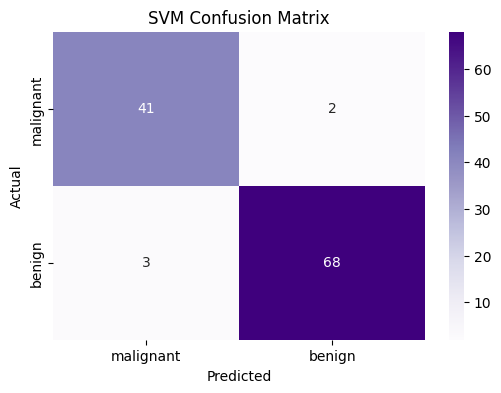

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Import Dataset and Tools
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 2. Load the Data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 3. Split the Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. MANUAL SCALING (Crucial for SVM)
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the training data's parameters
X_test_scaled = scaler.transform(X_test)

# 5. Initialize and Train the SVM Model
# We'll use a linear kernel first as it's very effective for this dataset
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# 6. Make Predictions
y_pred = svm_model.predict(X_test_scaled)

# 7. Final Evaluation
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# 8. Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()